# Week 13. Support Vector Machine

## 1. Load & generate data

In [1]:
import pandas as pds
import numpy as np
from sklearn.datasets import make_moons, make_classification, make_circles
from matplotlib import pyplot as plt

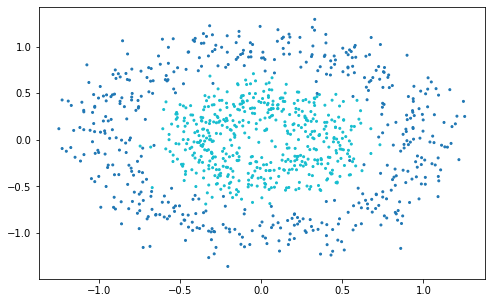

In [2]:
X, y = make_circles(1000, noise = .15, factor = .4)

toy_data = pds.DataFrame(
    np.concatenate([X,y[:, np.newaxis]], 1),
    columns = ['x1','x2','y']
)

fig,ax = plt.subplots(figsize = (8,5))
ax.scatter(data = toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)


## 2. Support Vector Machines

<img src = https://imgur.com/qsXNNPT.png width = 700>

In [3]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    colors = ('red','blue','green','black')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - .4
    x1_max = X[:,0].max() + .4
    x2_min = X[:,1].min() - .4
    x2_max = X[:,1].max() + .4
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig, ax = plt.subplots(1,1,figsize = (8, 5))
    
    ax.contourf(xx1,xx2,Z,alpha=0.2,cmap = color_Map)
    ax.set_xlim(xx1.min(),xx1.max())
    ax.set_ylim(xx2.min(),xx2.max())
    
    ax.scatter(*classifier.support_vectors_.transpose(), color = 'cyan', marker = 'o', alpha = .3, s = 15)
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.6, color = color_Map(idx),
                    s = 10,
                    marker = '.',
#                     markers[idx], 
                    label = cl
                   )
    fig.show()

C:\Users\keb20\AppData\Local\Temp/ipykernel_130700/2620096968.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


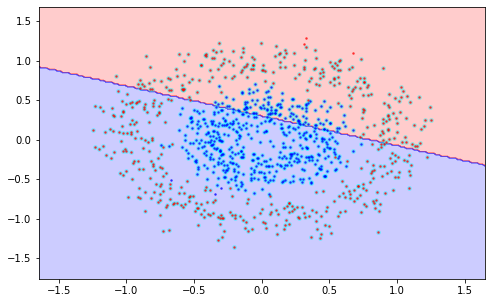

In [4]:
model = SVC(
    C = 1e+1, 
    degree = 5, 
    kernel = 'linear',
)
model.fit(X, y)

plot_decision_regions(X,y,model)

C:\Users\keb20\AppData\Local\Temp/ipykernel_130700/2620096968.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


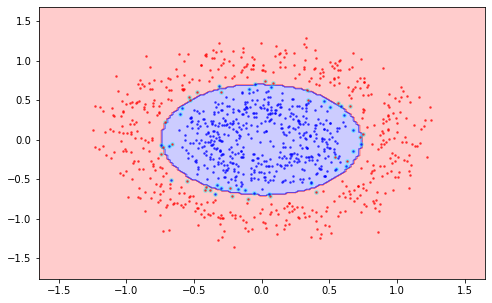

In [5]:
model = SVC(
    C = 1e+1, 
    degree = 2, 
    kernel = 'poly',
)
model.fit(X, y)

plot_decision_regions(X,y,model)

C:\Users\keb20\AppData\Local\Temp/ipykernel_130700/2620096968.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


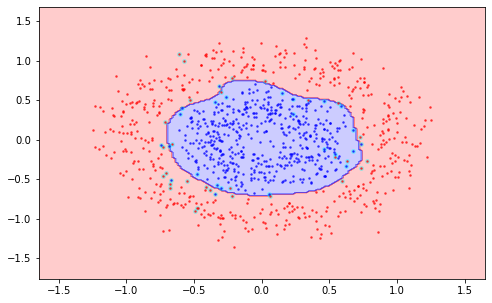

In [6]:
model = SVC(
    C = 1e+5, 
    degree = 1, 
    kernel = 'rbf',
)
model.fit(X, y)

plot_decision_regions(X,y,model)

## 3. Kernel Trick

<img src = https://imgur.com/YziNhtj.png width = 700 >

In [7]:
## trial: 자신만의 함수만들기

kernel_x = np.prod(np.exp(np.abs(X)+1), 1)

In [8]:
X.shape , kernel_x.shape

((1000, 2), (1000,))

ValueError: 'c' argument has 1000 elements, which is inconsistent with 'x' and 'y' with size 1.

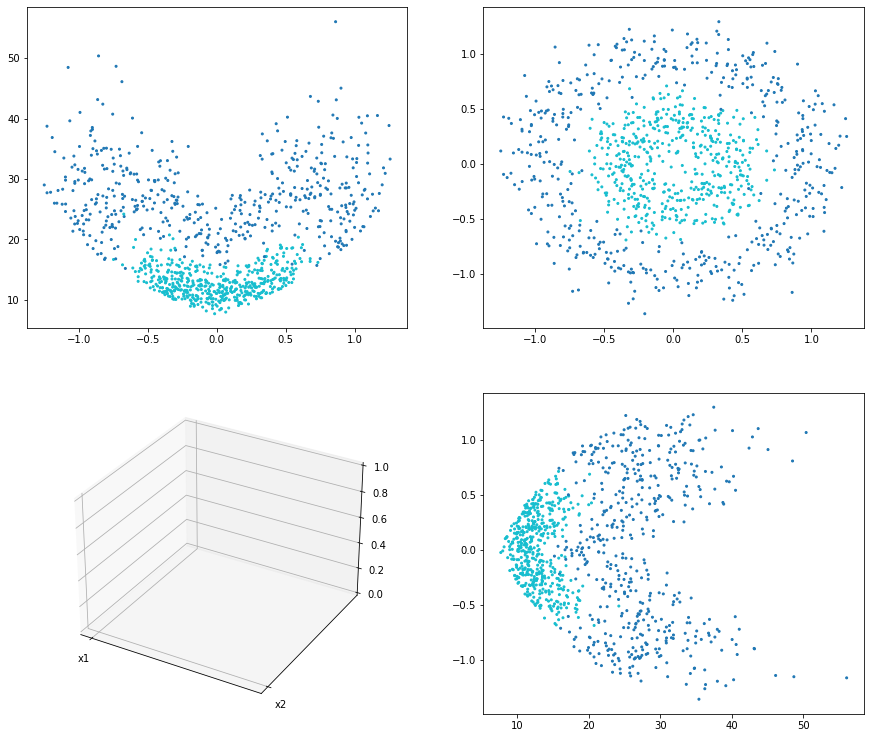

In [9]:
toy_data = pds.DataFrame(
    np.concatenate([X,kernel_x[:,np.newaxis], y[:, np.newaxis]], 1),
    columns = ['x1','x2','kernel x','y']
)

fig,ax = plt.subplots(2,2, figsize = (15,13))

ax[0][0].scatter(data = toy_data, x = 'x1', y = 'kernel x', c = 'y', cmap = 'tab10', s = 4)
ax[0][1].scatter(data = toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)
ax[1][1].scatter(data = toy_data, x = 'kernel x', y = 'x2', c = 'y', cmap = 'tab10', s = 4)




ax[1][0].remove()
ax = fig.add_subplot(223,projection = '3d')
ax.scatter(data = toy_data, xs = 'x1', ys = 'x2', zs = 'kernel x', c = 'y', cmap = 'tab10', s = 4)

fig.tight_layout()

## 3. Assignment 

아래 코드로 생성한 toy_data를 활용하여 지금까지 배워온 모든 분류기의 분류 영역을 시각화해주세요.

* Naive bayes classifier
* Decision Tree
* Logistic regression
* Ensemble
* Neural Network
* Support Vector Machine

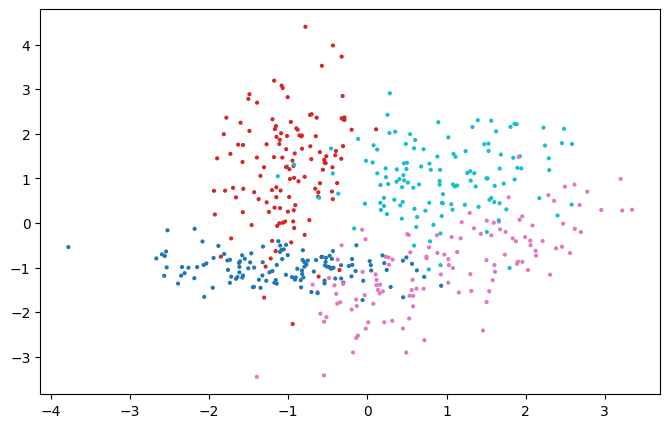

In [ ]:
Xs, ys = make_classification(
    n_samples = 500,
    n_features = 2, 
    n_classes = 4,
    n_clusters_per_class = 1,
    n_informative = 2,
    n_redundant = 0,
    random_state = 2023,
)

toy_data = pds.DataFrame(
    np.concatenate([Xs,ys[:, np.newaxis]], 1),
    columns = ['x1','x2','y']
)


fig,ax = plt.subplots(figsize = (8,5))
ax.scatter(data = toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)
